In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
deci = pd.read_csv('/Users/madhavan/Desktop/titanic/decision_label.csv')

In [79]:
deci

,Unnamed: 0,Age_bins,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,Survived,miss_info,star
0,0,2,3,2,7.2500,2,0,3,1,1,0,1,1
1,1,7,2,0,71.2833,3,0,1,0,1,1,0,2
2,2,4,3,2,7.9250,1,0,3,0,0,1,1,1
3,3,6,2,2,53.1000,3,0,1,0,1,1,0,0
4,4,6,3,2,8.0500,2,0,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,4,3,2,13.0000,4,0,2,1,0,0,1,0
887,887,1,1,2,30.0000,1,0,1,0,0,1,0,0
888,888,10,3,2,23.4500,1,2,3,0,1,0,2,1
889,889,4,2,0,30.0000,2,0,1,1,0,1,0,0


In [80]:
deci = deci[deci.columns.difference(['Unnamed:0'])]

In [81]:
y = deci.pop('Survived')
X = deci

In [82]:
X = X[X.columns.difference(['Unnamed: 0'])]

In [83]:
X

,Age_bins,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,miss_info,star
0,2,3,2,7.2500,2,0,3,1,1,1,1
1,7,2,0,71.2833,3,0,1,0,1,0,2
2,4,3,2,7.9250,1,0,3,0,0,1,1
3,6,2,2,53.1000,3,0,1,0,1,0,0
4,6,3,2,8.0500,2,0,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,4,3,2,13.0000,4,0,2,1,0,1,0
887,1,1,2,30.0000,1,0,1,0,0,0,0
888,10,3,2,23.4500,1,2,3,0,1,2,1
889,4,2,0,30.0000,2,0,1,1,0,0,0


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {
    'max_depth': range(1, 10),
    'min_samples_leaf': range(2, 20),
    'min_samples_split': range(2, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs= -1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 5832 candidates, totalling 29160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 16980 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 29160 out of 29160 | elapsed:   17.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'm

In [88]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8286516853932584
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


## Decision tree

In [89]:
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth= 5, 
                                  min_samples_leaf= 4,
                                  min_samples_split= 16)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [90]:
clf_gini.score(X_test,y_test)

0.8212290502793296

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [92]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(3,7),
    'min_samples_leaf': [2,3,4,5],
    'min_samples_split': range(4,20,2),
    'n_estimators': range(5,100,10) ,
    'max_features': range(1,5)
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [93]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5120 candidates, totalling 25600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 1731 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 2781 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 4131 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 5781 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 7731 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9981 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 12531 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 15381 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 18531 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 21981 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 25600 out of 25600 | elapsed:  7.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [94]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8398876404494382 using {'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 18, 'n_estimators': 75}


## Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=6,
                             min_samples_leaf= 2, 
                             min_samples_split= 18,
                             max_features= 2,
                             n_estimators= 75,n_jobs = -1,verbose = 1)

In [96]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [97]:
predictions = rfc.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  75 out of  75 | elapsed:    0.0s finished


In [98]:
accuracy_score(y_test,predictions)

0.8379888268156425

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [100]:
param_grid = {"base_estimator__max_depth" : [2,3,4,5,6,7,8],"n_estimators": range(1,1000,100),"learning_rate": [0.001,0.01,0.1,0.5,1]}

In [101]:
tree = DecisionTreeClassifier( random_state = 100)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree)

In [102]:
folds = 5
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1 , n_jobs = -1)


In [103]:
grid_search_ABC.fit(X_train, y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1090 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1440 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:  8.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                

In [104]:
grid_search_ABC.best_score_

0.8752900734859816

In [105]:
grid_search_ABC.best_params_

{'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 901}

## ADABOOST

In [106]:
tree = DecisionTreeClassifier(random_state = 100,
                                  max_depth= 2)

adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators= 901,learning_rate = 0.01  )

In [107]:
adaboost_model_1.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

In [108]:
predictions_ada = adaboost_model_1.predict_proba(X_test)
pred_ada = adaboost_model_1.predict(X_test)
metrics.roc_auc_score(y_test,predictions_ada[:,-1])


0.8731410256410257

In [109]:
metrics.accuracy_score(y_test,pred_ada)

0.8212290502793296

In [110]:
test_temp = pd.read_csv('/Users/madhavan/Desktop/titanic/test_label.csv')
test_temp

,Unnamed: 0,Age_bins,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,Survived,miss_info,star
0,0,6,3,1,7.8292,2,0,3,1,0,0,1,0
1,1,8,3,2,7.0000,3,0,3,0,1,0,1,0
2,2,9,3,1,9.6875,2,0,2,1,0,0,1,0
3,3,4,3,2,8.6625,2,0,3,1,0,0,1,0
4,4,2,3,2,12.2875,3,1,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,10,3,2,8.0500,2,0,3,1,0,0,2,1
414,414,7,2,0,108.9000,4,0,1,0,0,0,0,2
415,415,7,3,2,7.2500,2,0,3,1,0,0,1,1
416,416,10,3,2,8.0500,2,0,3,1,0,0,2,0


In [111]:
test_temp = test_temp[X_train.columns]

In [112]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance


folds = 5


# specify range of hyperparameters
param_grid = {'learning_rate': [0.01], 
             'subsample': [0.5, 0.6, 0.9] , 'max_depth': range(2,7), 'n_estimators' : range(800,2000,200) }          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, n_jobs= -1)      


In [113]:
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   42.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     

In [114]:
model_cv.best_score_

0.8743692214681829

In [115]:
model_cv.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1400, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.5, tree_method=None,
              validate_parameters=False, verbosity=None)

### XGBOOST

In [116]:
params = {'learning_rate': 0.01,
          'max_depth': 3, 
          'n_estimators': 1400,
          'subsample':0.5}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic',
              params={'learning_rate': 0.01, 'max_depth': 3,
                      'n_estimators': 1400, 'subsample': 0.5},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

In [117]:
y_pred = model.predict(X_test)

In [118]:
accu = metrics.accuracy_score(y_test, y_pred)
accu

0.8156424581005587

In [119]:
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'Age_bins': 0.02487703,
 'Cabin_Alph': 0.026809227,
 'Embarked': 0.022959674,
 'Fare': 0.025112357,
 'Name_status': 0.032871895,
 'Parch': 0.017324036,
 'Pclass': 0.14358905,
 'Sex': 0.52488464,
 'SibSp': 0.04675473,
 'miss_info': 0.09440185,
 'star': 0.04041547}

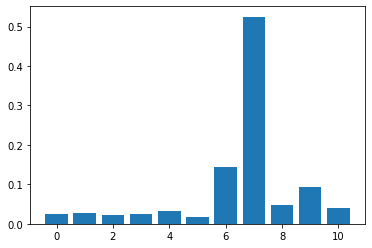

In [120]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [121]:
test_temp

,Age_bins,Cabin_Alph,Embarked,Fare,Name_status,Parch,Pclass,Sex,SibSp,miss_info,star
0,6,3,1,7.8292,2,0,3,1,0,1,0
1,8,3,2,7.0000,3,0,3,0,1,1,0
2,9,3,1,9.6875,2,0,2,1,0,1,0
3,4,3,2,8.6625,2,0,3,1,0,1,0
4,2,3,2,12.2875,3,1,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,10,3,2,8.0500,2,0,3,1,0,2,1
414,7,2,0,108.9000,4,0,1,0,0,0,2
415,7,3,2,7.2500,2,0,3,1,0,1,1
416,10,3,2,8.0500,2,0,3,1,0,2,0


In [134]:
c = 1
for x in [clf_gini,rfc,adaboost_model_1,model]:
    pred = x.predict(test_temp)
    
    new = pd.DataFrame()
    new['PassengerId'] = t['PassengerId']
    new['Survived'] = pred
    new.index = new['PassengerId']
    del new['PassengerId']
    
    new.to_csv('prediction_' + str(c)+ '.csv')
    c+=1
    
    

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  75 out of  75 | elapsed:    0.0s finished


In [133]:
new

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [127]:
t = pd.read_csv('/Users/madhavan/Desktop/titanic/submission_LOG.csv')
t

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf= 2, 
                             min_samples_split= 4,
                             max_features= 4,
                             n_estimators= 35,n_jobs = -1,verbose = 1)
rfc_1.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [145]:
pre = rfc_1.predict(X)
accuracy_score(y,pre)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    0.0s finished


0.856341189674523

In [146]:
for x in [rfc_1]:
    pred = x.predict(test_temp)
    
    new = pd.DataFrame()
    new['PassengerId'] = t['PassengerId']
    new['Survived'] = pred
    new.index = new['PassengerId']
    del new['PassengerId']
    
    new.to_csv('prediction_' + str(c)+ '.csv')
    c+=1

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    0.0s finished


In [141]:
param_grid = {
    'max_depth': range(3,7),
    'min_samples_leaf': [2,3,4,5],
    'min_samples_split': range(4,20,2),
    'n_estimators': range(5,100,10) ,
    'max_features': range(1,5)
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [142]:
grid_search.fit(X,y)

Fitting 5 folds for each of 5120 candidates, totalling 25600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1407 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 2807 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 4607 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 6807 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 9407 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 12407 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 15807 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 19607 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 23807 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 25600 out of 25600 | elapsed:  5.4min finished
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from T

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [143]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 35}

In [147]:
one = pd.read_csv('/Users/madhavan/Desktop/titanic/prediction_1.csv')
two = pd.read_csv('/Users/madhavan/Desktop/titanic/prediction_2.csv')
three = pd.read_csv('/Users/madhavan/Desktop/titanic/prediction_3.csv')
four = pd.read_csv('/Users/madhavan/Desktop/titanic/prediction_4.csv')
five = pd.read_csv('/Users/madhavan/Desktop/titanic/prediction_5.csv')
six = pd.read_csv('/Users/madhavan/Desktop/titanic/prediction_6.csv')

In [158]:
merge = pd.concat([one,two,three,four,five,six],axis = 1)

In [163]:
merge['ens_prob'] = merge['Survived'].mean(axis = 1)

In [171]:
save = merge['ens_prob'].map(lambda x:1 if x >= 0.5 else 0)

In [169]:
merge['Survived'].mean()

Survived    0.327751
Survived    0.339713
Survived    0.337321
Survived    0.363636
Survived    0.354067
Survived    0.366029
dtype: float64

In [173]:
c = 7

    
new = pd.DataFrame()
new['PassengerId'] = t['PassengerId']
new['Survived'] = save
new.index = new['PassengerId']
del new['PassengerId']
    
new.to_csv('prediction_' + str(c)+ '.csv')
    

In [178]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 35}

In [176]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 35}